In [138]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re
import numpy as np
import plotnine as plt9


In [181]:
df = make_plots_each_algorithm("../src/results/first_attempt_result_4_balancers.csv")
df = pd.read_csv("../src/results/first_attempt_result_4_balancers.csv")
df = df[df['Metrics'].apply(lambda x: False if x.split("-")[1] in ['TP','TN','FP','FN','FalsePositiveRate','FalseNegativeRate'] else True)]
df['Score'] = round(df['Score'],2)
df['Set'] = df['Metrics'].apply(lambda x: x.split("-")[0])

In [182]:
balancers = df['Imbalance'].unique()
metrics = df['Metrics'].unique()

bal_df = df.groupby(['Algorithm','Imbalance','Metrics','Set'],as_index=False)['Score'].max()



In [183]:
bar_plot = plt9.ggplot(bal_df, plt9.aes(x='Algorithm', y='Score', fill='Metrics')) + \
           plt9.facet_grid(rows='Imbalance',cols='Set') + \
           plt9.geom_col(position='dodge') + \
           plt9.theme_minimal() + \
           plt9.theme(figure_size=(15,15)) 
           # plt9.geom_text()




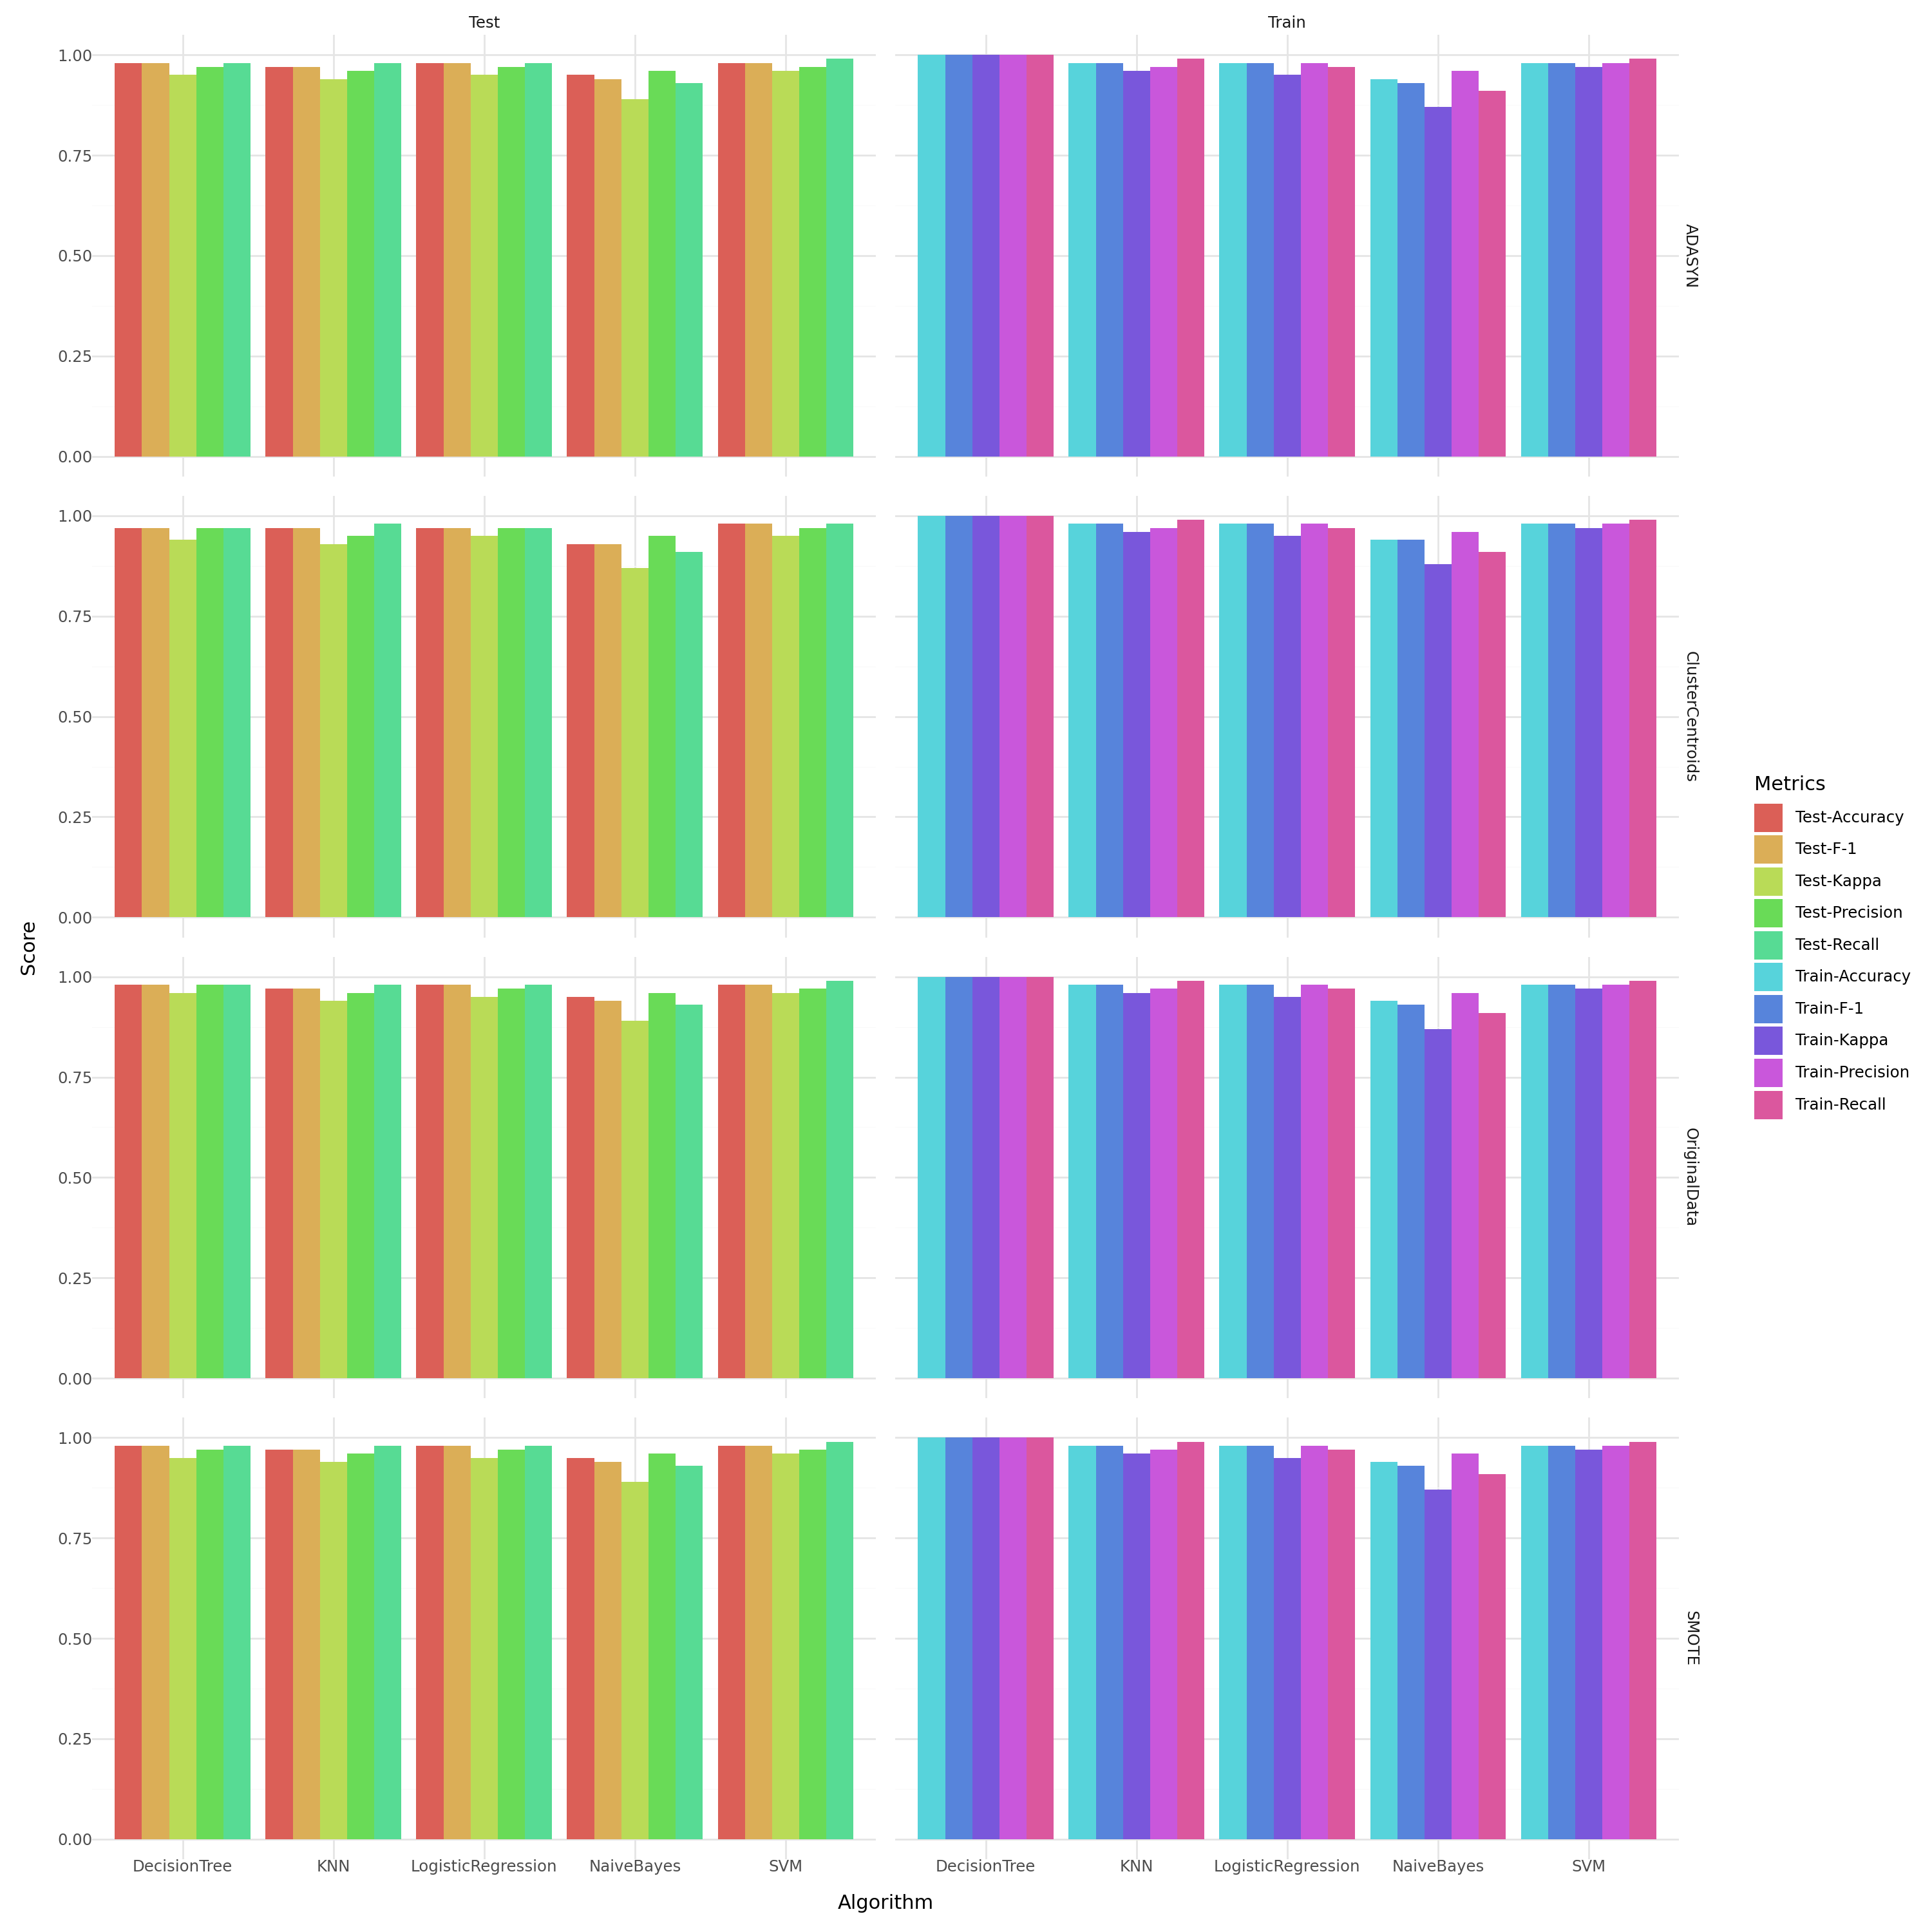

In [184]:
bar_plot